In [1]:
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum
from queue import PriorityQueue
from scipy.spatial import Voronoi
from bresenham import bresenham
from planning_utils import heuristic, create_grid_and_edges
from udacidrone.frame_utils import global_to_local
import networkx as nx

In [2]:
data = np.loadtxt('colliders.csv', delimiter=',', dtype='Float64', skiprows=2)
TARGET_ALTITUDE = 5
SAFETY_DISTANCE = 3

In [21]:
def a_star_ng(graph, heuristic, start, goal):
    """Modified A* to work with NetworkX graphs."""
    path = []
    queue = PriorityQueue()
    queue.put((0, start))
    visited = set(start)

    branch = {}
    found = False
    while not queue.empty():
        item = queue.get()
        current_cost = item[0]
        current_node = item[1]

        if current_node == goal:
            print('Found a path.')
            found = True
            break
        else:
            for next_node in graph[current_node]:
                cost = graph.edges[current_node, next_node]['weight']
                new_cost = current_cost + cost + heuristic(next_node, goal)

                if next_node not in visited:
                    visited.add(next_node)
                    queue.put((new_cost, next_node))

                    branch[next_node] = (new_cost, current_node)

    path = []
    path_cost = 0
    if found:
        # retrace steps
        path = []
        n = goal
        path_cost = branch[n][0]
        path.append(goal)
        while branch[n][1] != start:
            path.append(branch[n][1])
            n = branch[n][1]
        path.append(branch[n][1])
    path = [(int(p[0]), int(p[1])) for p in path]
    return path[::-1], path_cost


def closest_point(graph, current_point):
    """
    Compute the closest point in the `graph`
    to the `current_point`.
    """
    closest_point = None
    dist = 100000
    for p in graph.nodes:
        d = np.linalg.norm(np.array(p) - np.array(current_point))
        if d < dist:
            closest_point = p
            dist = d
    return closest_point

def bres_prune(grid, path): 
    """
    Use the Bresenham module to trim uneeded waypoints from path
    """
    pruned_path = [p for p in path]
    gnr_path = (p for p in path)
    gnf_path = gnr_path
    
    bres_q = [next(gnf_path),next(gnf_path),next(gnf_path)]
    
    while(bres_q)
        if len(bres_q) < 3:
            bres_q.append(next(gnf_path))
        else:
            if all(cells = bresenham(bres_q[0][:2], bres_q[-1][:2])
            print(cells)
        


grid, edges, north_offset, east_offset = create_grid_and_edges(data, TARGET_ALTITUDE, SAFETY_DISTANCE)
print("North Offset: {} East Offset: {}".format(north_offset, east_offset))

# TODO: convert start position to current position rather than map center
#north, east = 316, 445
start_ne = [-north_offset,-east_offset]
print("Start NE: {}".format(start_ne))

# TODO: adapt to set goal as latitude / longitude position and convert

#goal_ne = (
goal_ne = (-north_offset + 400, -east_offset - 100)

G = nx.Graph()
for e in edges:
    p1 = e[0]
    p2 = e[1]
    dist = np.linalg.norm(np.array(p2) - np.array(p1))
    G.add_edge(p1, p2, weight=dist)

start_ne_g = closest_point(G, start_ne)

goal_ne_g = closest_point(G, goal_ne)

path, cost = a_star_ng(G, heuristic, start_ne_g, goal_ne_g)

# TODO: prune path to minimize number of waypoints
path = bres_prune(grid, path)
print("Path Length: {}".format(len(path)))


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 79)

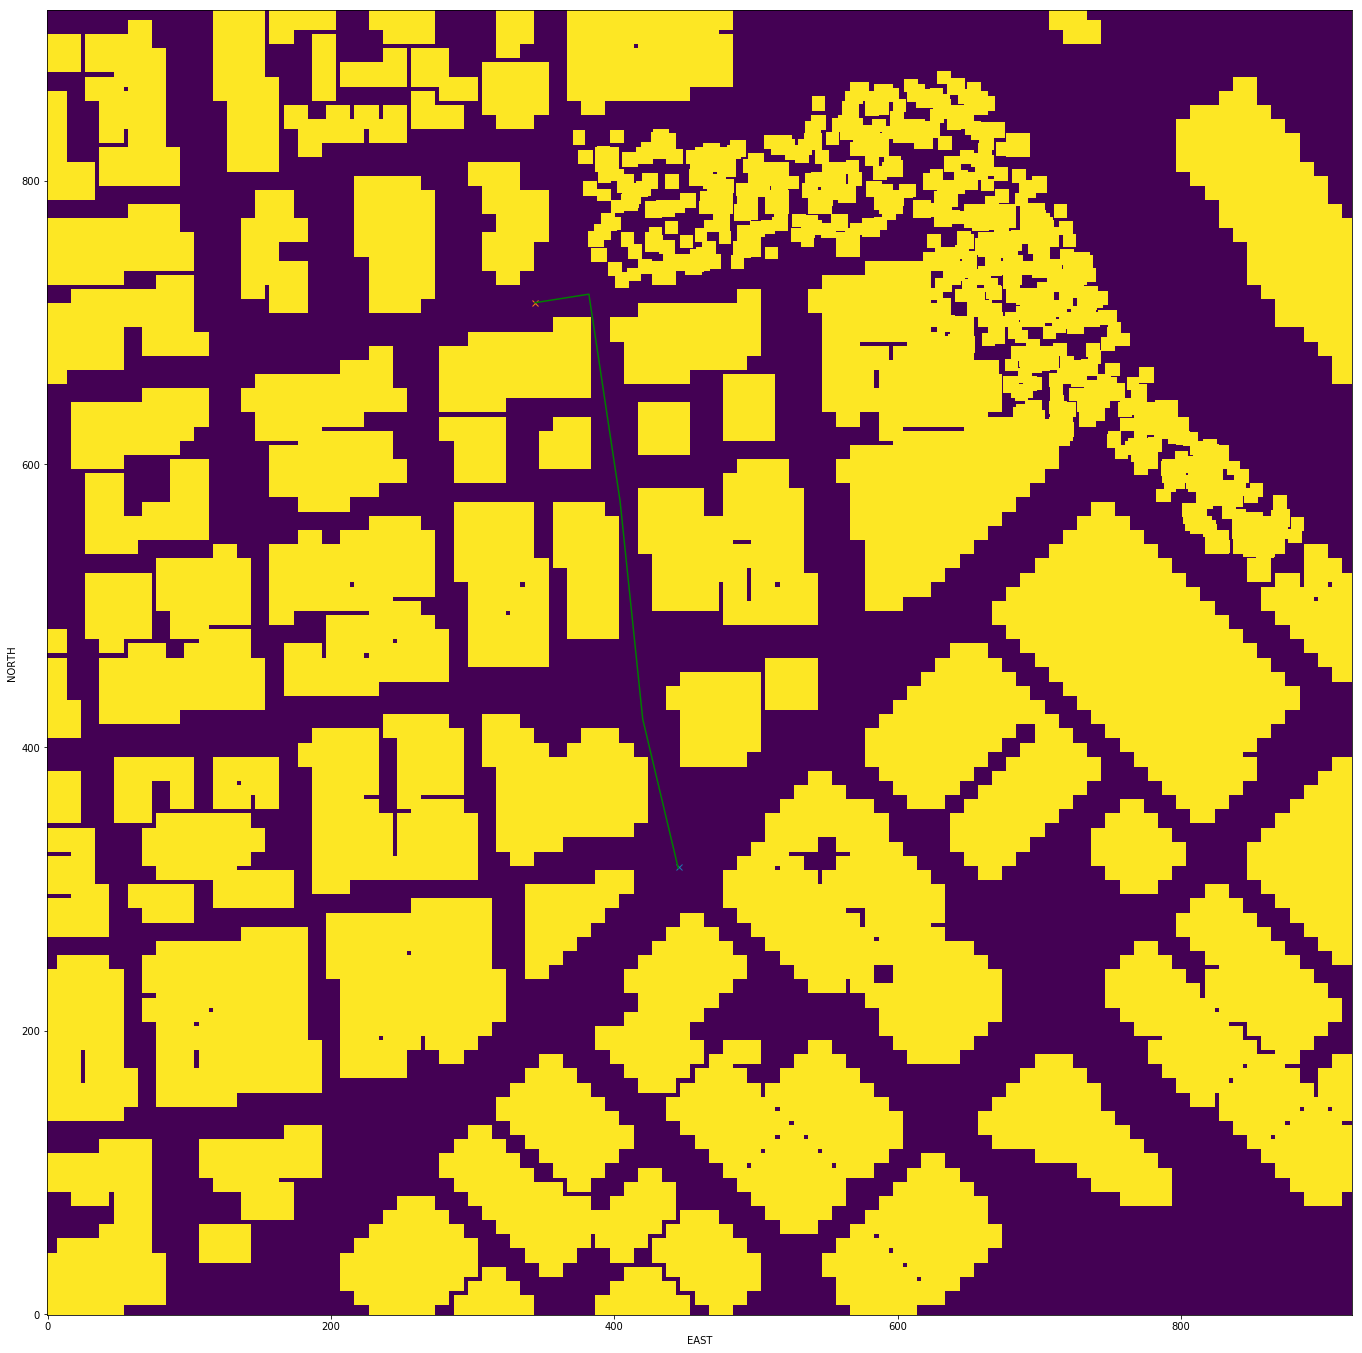

In [14]:
plt.plot(start_ne_g[1], start_ne_g [0], 'x')
plt.plot(goal_ne_g[1], goal_ne_g [0], 'x')

pp = np.array(path)
plt.plot(pp[:, 1], pp[:, 0], 'g')

plt.rcParams['figure.figsize'] = 24, 24
# equivalent to
# plt.imshow(np.flip(grid, 0))
plt.imshow(grid, origin='lower') 

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()